#LAB - 11
#Runge Kutta and Trapezoidal Method for Solving ODE's

Rakshit Pandhi - 202201426

Kalp Shah - 202201457

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def newton_method(f,df,x0,tol = 1e-6,max_iter = 100):
  x = x0
  for _ in range(max_iter):
    x_new = x - f(x)/df(x)
    if abs(x_new-x)<tol:
      return x_new
    x = x_new
  return x

In [ ]:
def backward_euler(f,df,y0,start,end,h):
  n = int((end - start)/h)
  t = np.linspace(start,end,n+1)
  y = np.zeros_like(t)
  y[0] = y0
  for i in range(n):
    def g(y_next):
      return y_next - h*f(t[i+1],y_next) - y[i]
    def dg(y_next):
      return 1 - h*df(t[i+1],y_next)
    y_guess = y[i]
    y[i+1] = newton_method(g,dg,y_guess)
  return t,y

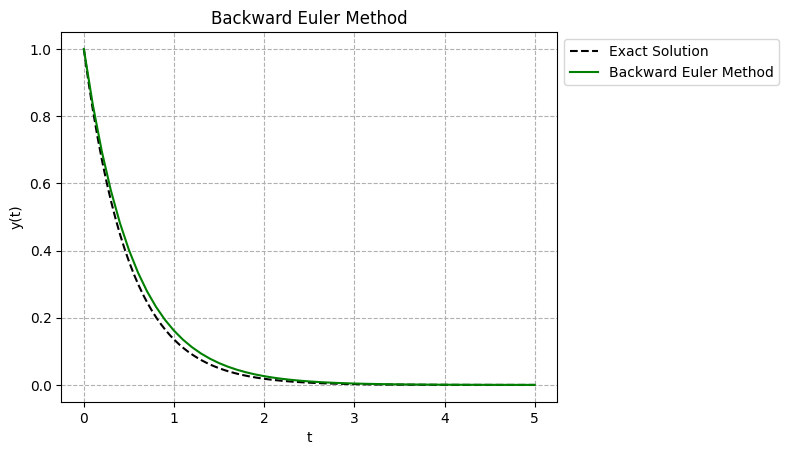

In [ ]:
def f(t, y):
    return -2 * y
def df(t, y):
    return -2
y0 = 1
start = 0
end = 5
h = 0.1
 # Backward Euler Method
t_bwd, y_bwd = backward_euler(f, df, y0, start, end, h)
t_exact = np.linspace(start, end, 100)
y_exact = np.exp(-2 * t_exact)
plt.figure()
plt.plot(t_exact, y_exact, label='Exact Solution', linestyle='--',
color='black')
plt.plot(t_bwd, y_bwd, label='Backward Euler Method', color='green')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Backward Euler Method')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--')
plt.show()


In [ ]:
def trapezoidal(f, df, y0, start, end, h):
    n = int((end - start) / h)
    t = np.linspace(start, end, n + 1)
    y = np.zeros_like(t)
    y[0] = y0
    for i in range(n):
        def g(y_next):
            return y_next - y[i] - (h / 2) * (f(t[i], y[i]) + f(t[i+1], y_next))
        def dg(y_next):
            return 1 - (h / 2) * df(t[i+1], y_next)
        y_guess = y[i]
        y[i + 1] = newton_method(g, dg, y_guess)
    return t, y


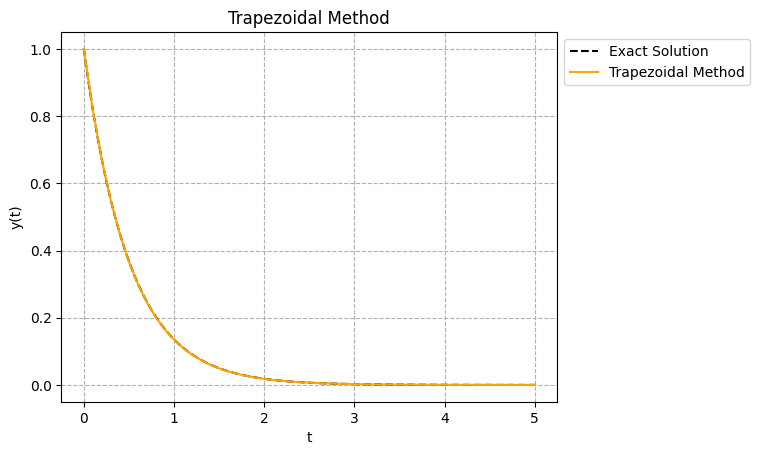

In [ ]:
t_trap, y_trap = trapezoidal(f, df, y0, start, end, h)

plt.figure()
plt.plot(t_exact, y_exact, label='Exact Solution', linestyle='--',
color='black')
plt.plot(t_trap, y_trap, label='Trapezoidal Method', color='orange')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Trapezoidal Method')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--')
plt.show()

In [ ]:
def compute_error(f,t_vals,y_vals):
  y_actual = np.array([f(t) for t in t_vals])
  error = np.abs(y_actual - y_vals)
  rel = error/np.abs(y_actual)
  return error,rel

In [ ]:
def plot_backward(t_vals,y_vals,f,title):
  y_actual = np.array([f(t) for t in t_vals])
  plt.plot(t_vals,y_vals,label = 'Euler Backward Approximation',marker
= 'o',markersize=4,color = 'blue')
  plt.plot(t_vals,y_actual,label = 'Actual Value',color = 'black')
  plt.title(title)
  plt.xlabel('x')
  plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))
  plt.grid(True,linestyle = '--')
  plt.show()

def plot_trapezoidal(t_vals,y_vals,f,title):
  y_actual = np.array([f(t) for t in t_vals])
  plt.plot(t_vals,y_vals,label = 'Trapezoidal Approximation',marker =
'o',markersize=4,color = 'blue')
  plt.plot(t_vals,y_actual,label = 'Actual Value',color = 'black')
  plt.title(title)
  plt.xlabel('x')
  plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))
  plt.grid(True,linestyle = '--')
  plt.show()

In [ ]:
def ode(x,y,l):
  return l*y + (1-l)*np.cos(x) - (1+l)*np.sin(x)
def true(x):
  return np.sin(x) + np.cos(x)
def backward_euler_2(f, df, l, y0, start, end, h):
    n = int((end - start) / h)
    t_bwd = np.linspace(start, end, n + 1)
    y_bwd = np.zeros(n + 1)
    y_bwd[0] = y0
    for i in range(n):
        def g(y_next):
            return y_next - y_bwd[i] - h * f(t_bwd[i + 1], y_next, l)
        def dg(y_next):
            return 1 - h * df(t_bwd[i + 1], y_next, l)
        y_guess = y_bwd[i]
        y_bwd[i + 1] = newton_method(g, dg, y_guess)
    return t_bwd, y_bwd
def solve_backward(l, h_vals, y0=1, start=0, end=10):
    for h in h_vals:
        t_bwd, y_bwd = backward_euler_2(ode, df=lambda x, y, l: l,
l=l, y0=y0, start=start, end=end, h=h)
        error, rel = compute_error(true, t_bwd, y_bwd)
        print(f"Lambda = {l}, Step size h = {h}:")
        print(f"Error at t = {t_bwd[-1]}: {error[-1]:.6f}")
        print(f"Relative error at t = {t_bwd[-1]}: {rel[-1]:.6f}")
        plot_backward(t_bwd, y_bwd, true, f"Backward Euler Method for Lambda = {l}, h = {h}")
def trapezoidal_2(f, df, l, y0, start, end, h):
    n = int((end - start) / h)
    t_trap = np.linspace(start, end, n + 1)
    y_trap = np.zeros(n + 1)
    y_trap[0] = y0
    for i in range(n):
        def g(y_next):
            return y_next - y_trap[i] - (h / 2) * (f(t_trap[i],
y_trap[i], l) + f(t_trap[i + 1], y_next, l))
        def dg(y_next):
            return 1 - (h / 2) * df(t_trap[i + 1], y_next, l)
        y_guess = y_trap[i]
        y_trap[i + 1] = newton_method(g, dg, y_guess)
    return t_trap, y_trap
def solve_trapezoidal(l, h_vals, y0=1, start=0, end=10):
    for h in h_vals:
        t_trap, y_trap = trapezoidal_2(ode, df=lambda x, y, l: l, l=l,
y0=y0, start=start, end=end, h=h)
        error, rel = compute_error(true, t_trap, y_trap)
        print(f"Lambda = {l}, Step size h = {h}:")
        print(f"Error at t = {t_trap[-1]}: {error[-1]:.6f}")
        print(f"Relative error at t = {t_trap[-1]}: {rel[-1]:.6f}")
        plot_trapezoidal(t_trap, y_trap, true, f"Trapezoidal Method for Lambda = {l}, h = {h}")

Lambda = -1, Step size h = 0.5:
Error at t = 10.0: 0.114451
Relative error at t = 10.0: 0.082750


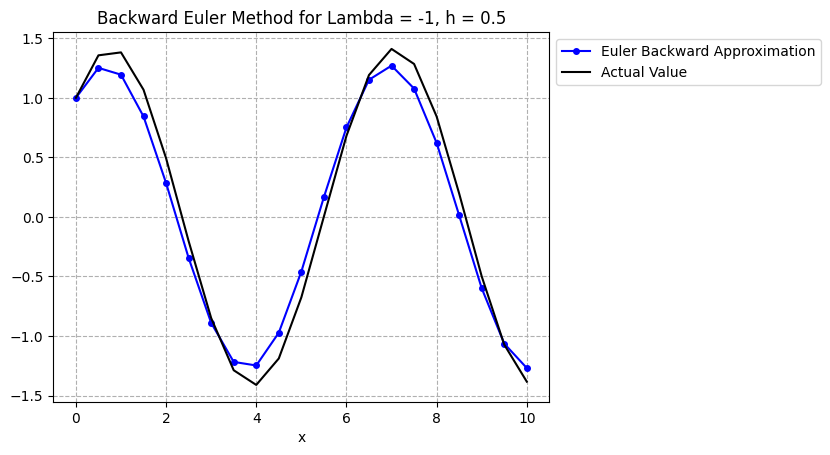

Lambda = -1, Step size h = 0.25:
Error at t = 10.0: 0.062138
Relative error at t = 10.0: 0.044927


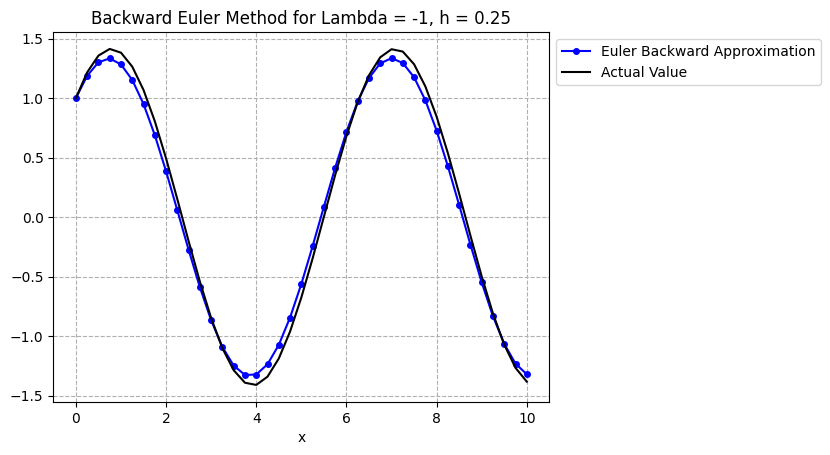

Lambda = -1, Step size h = 0.125:
Error at t = 10.0: 0.032467
Relative error at t = 10.0: 0.023474


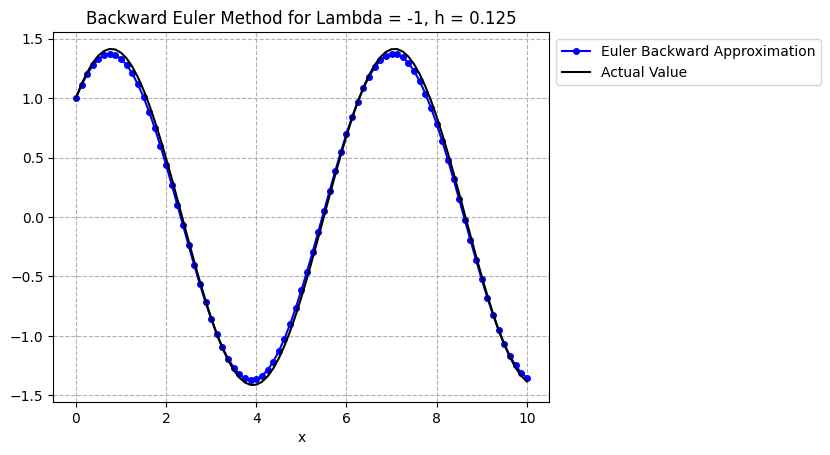

Lambda = -1, Step size h = 0.5:
Error at t = 10.0: 0.017860
Relative error at t = 10.0: 0.012913


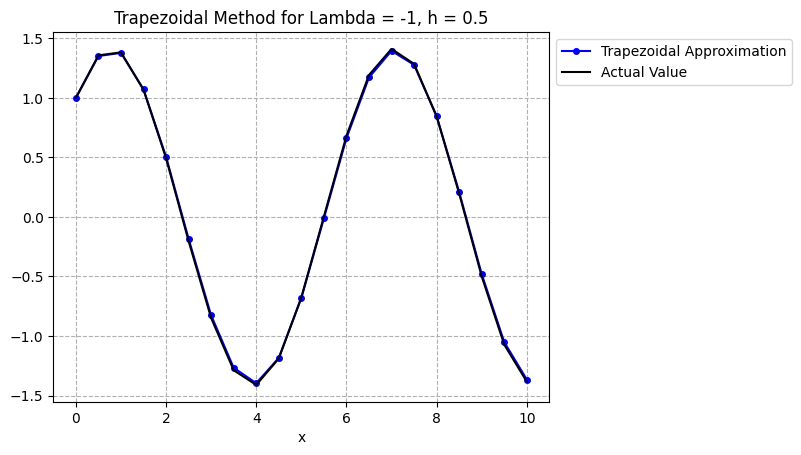

Lambda = -1, Step size h = 0.25:
Error at t = 10.0: 0.004394
Relative error at t = 10.0: 0.003177


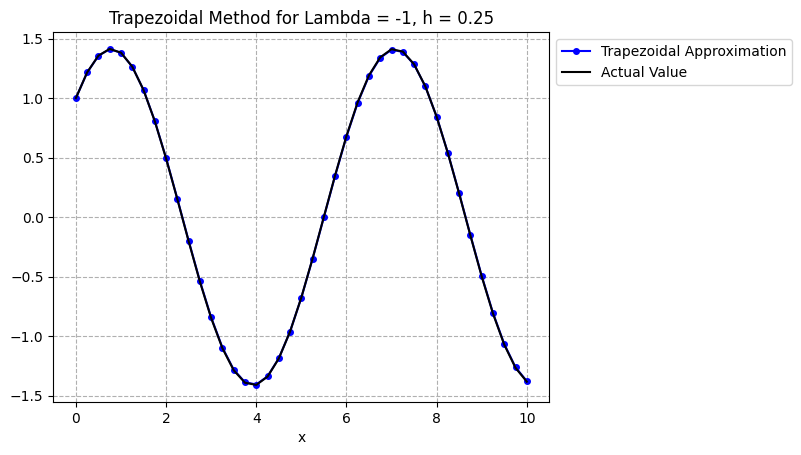

Lambda = -1, Step size h = 0.125:
Error at t = 10.0: 0.001094
Relative error at t = 10.0: 0.000791


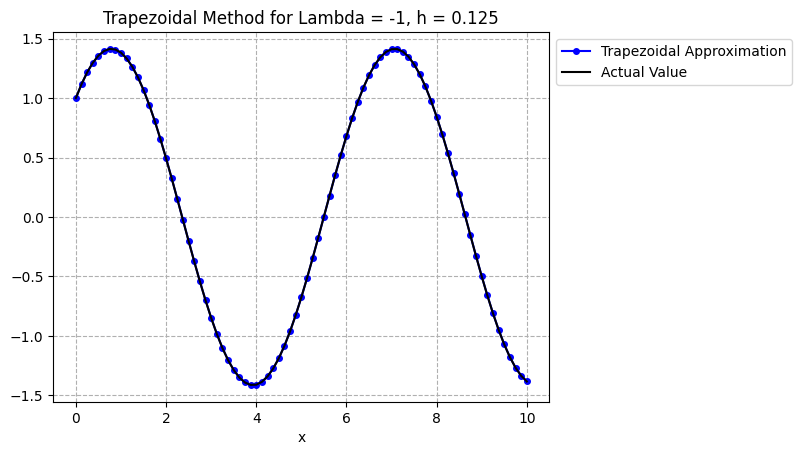

In [ ]:
h_vals = [0.5,0.25,0.125]
solve_backward(-1,h_vals)
solve_trapezoidal(-1,h_vals)



# **Question 2**

Lambda = 1, Step size h = 0.5:
Error at t = 10.0: 301291.526925
Relative error at t = 10.0: 217839.006744


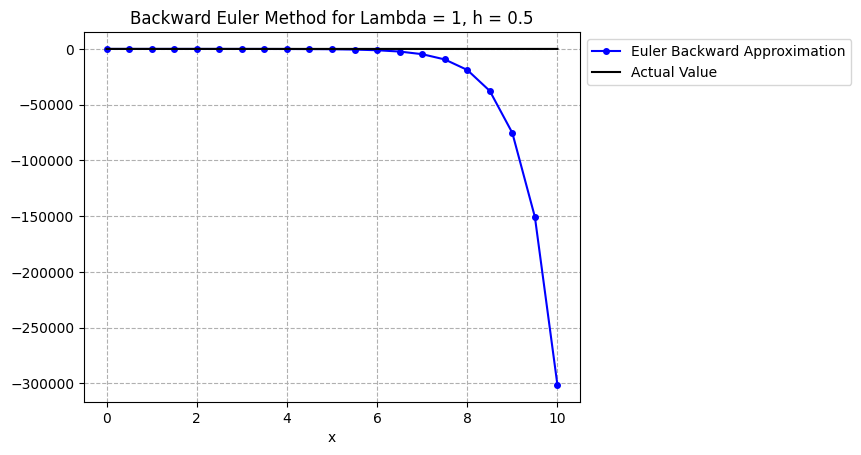

Lambda = 1, Step size h = 0.25:
Error at t = 10.0: 13276.432270
Relative error at t = 10.0: 9599.091114


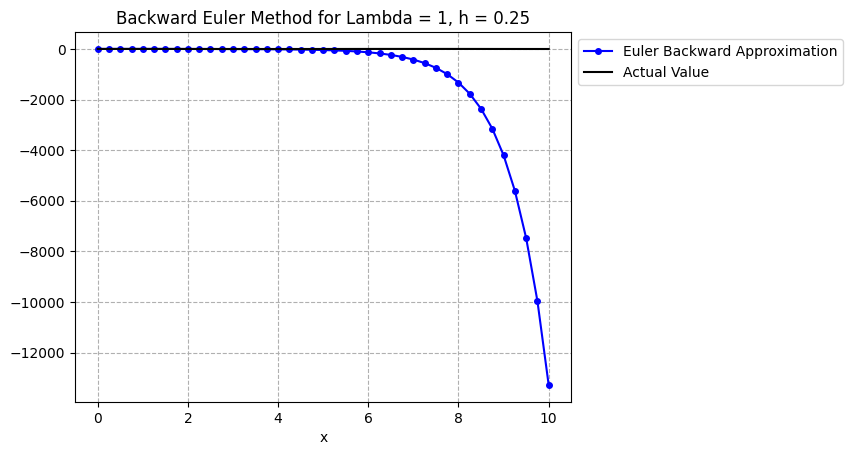

Lambda = 1, Step size h = 0.125:
Error at t = 10.0: 2813.045944
Relative error at t = 10.0: 2033.881074


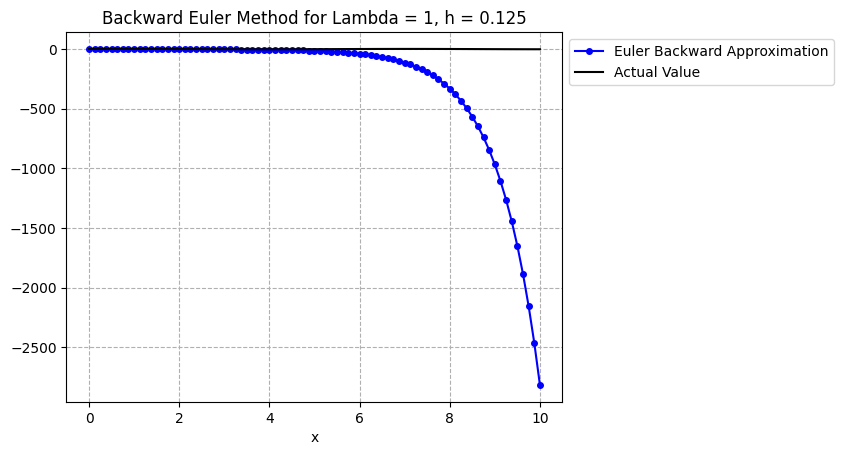

Lambda = 1, Step size h = 0.5:
Error at t = 10.0: 6.123651
Relative error at t = 10.0: 4.427506


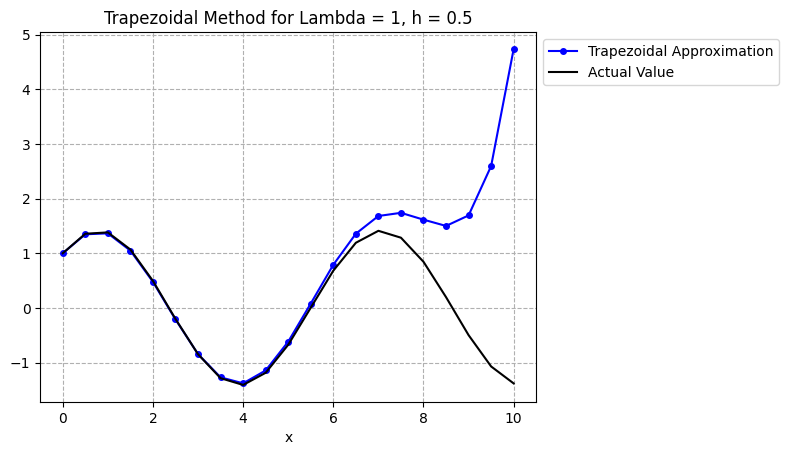

Lambda = 1, Step size h = 0.25:
Error at t = 10.0: 0.320043
Relative error at t = 10.0: 0.231397


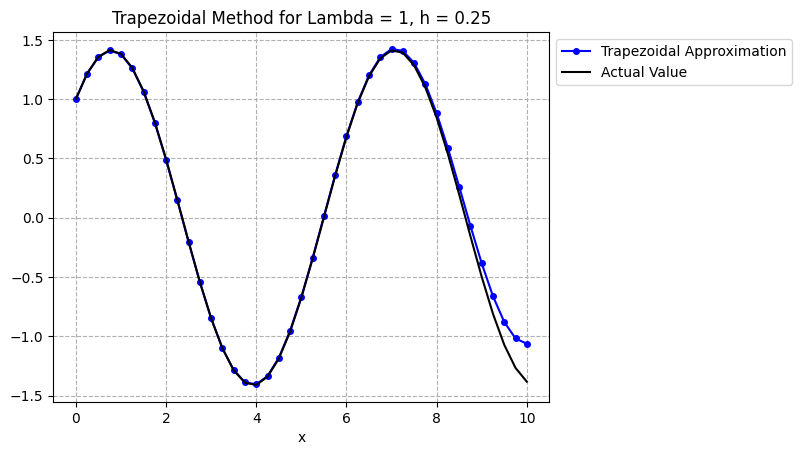

Lambda = 1, Step size h = 0.125:
Error at t = 10.0: 0.019662
Relative error at t = 10.0: 0.014216


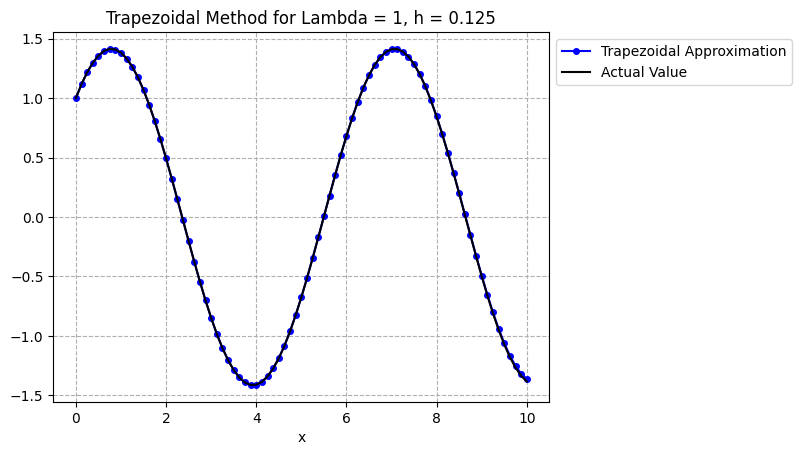

In [ ]:
solve_backward(1,h_vals)
solve_trapezoidal(1,h_vals)

# **Question 3**

Lambda = -5, Step size h = 0.5:
Error at t = 10.0: 0.055880
Relative error at t = 10.0: 0.040402


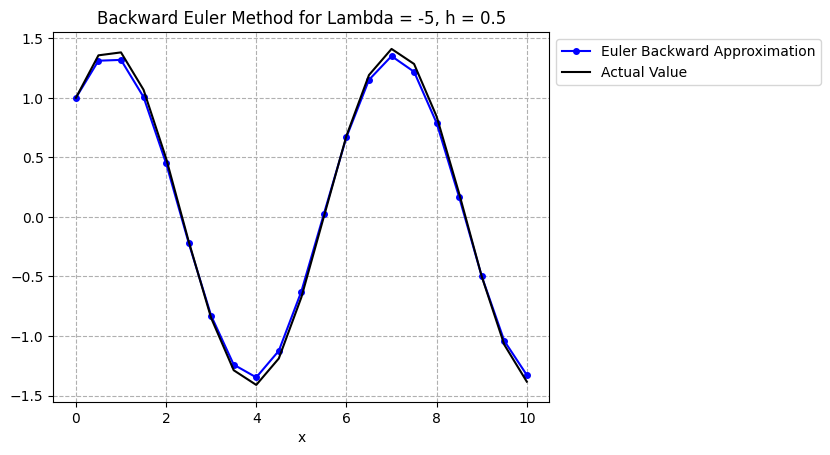

Lambda = -5, Step size h = 0.25:
Error at t = 10.0: 0.029925
Relative error at t = 10.0: 0.021636


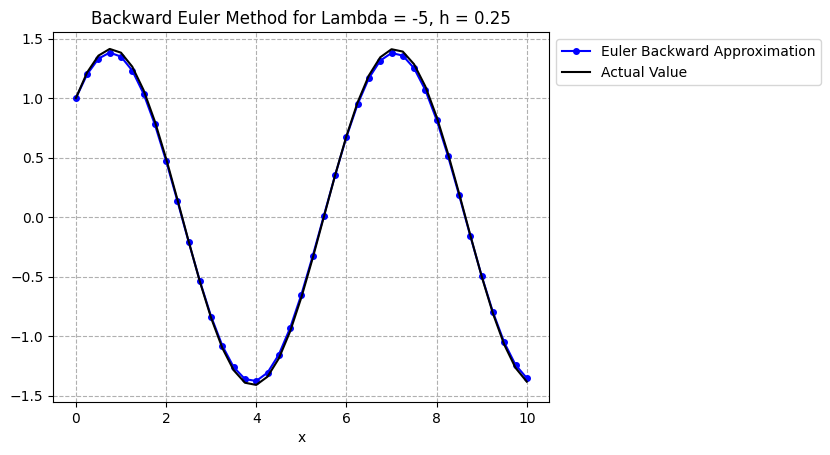

Lambda = -5, Step size h = 0.125:
Error at t = 10.0: 0.015445
Relative error at t = 10.0: 0.011167


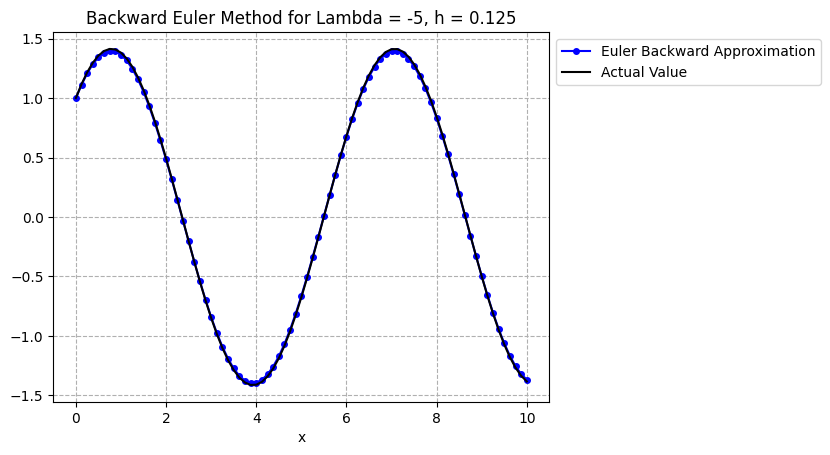

Lambda = -5, Step size h = 0.0625:
Error at t = 10.0: 0.007841
Relative error at t = 10.0: 0.005669


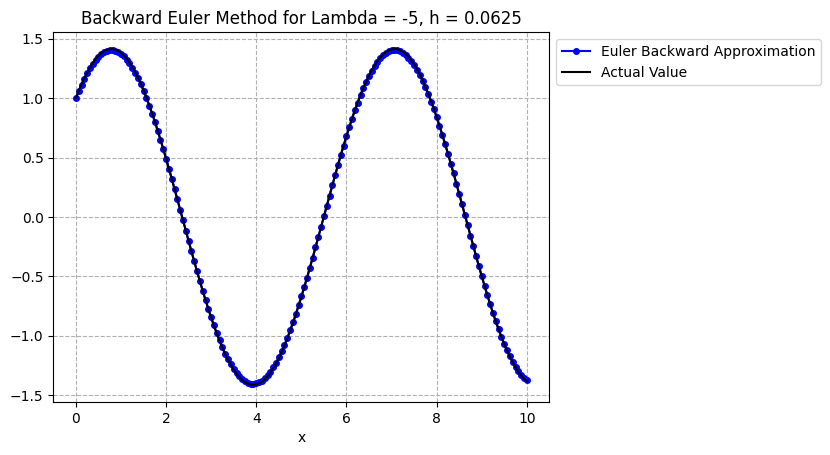

Lambda = -5, Step size h = 0.5:
Error at t = 10.0: 0.002369
Relative error at t = 10.0: 0.001713


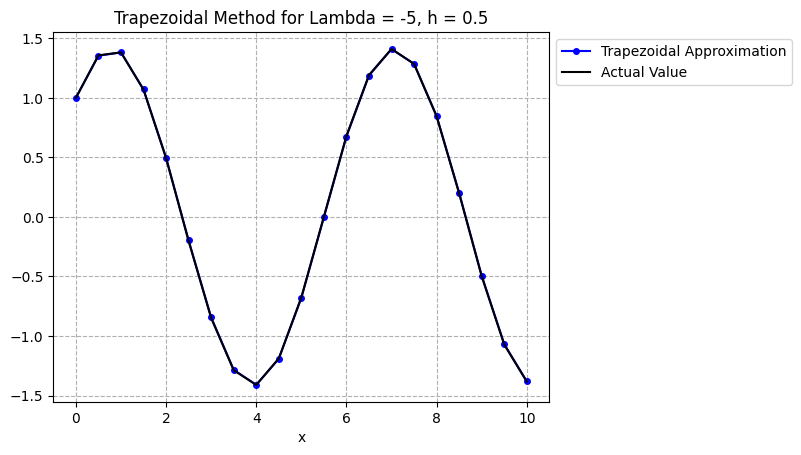

Lambda = -5, Step size h = 0.25:
Error at t = 10.0: 0.000577
Relative error at t = 10.0: 0.000417


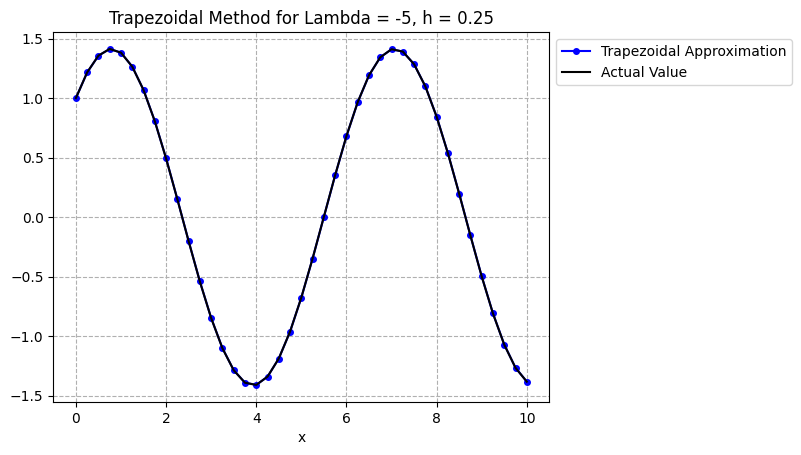

Lambda = -5, Step size h = 0.125:
Error at t = 10.0: 0.000143
Relative error at t = 10.0: 0.000104


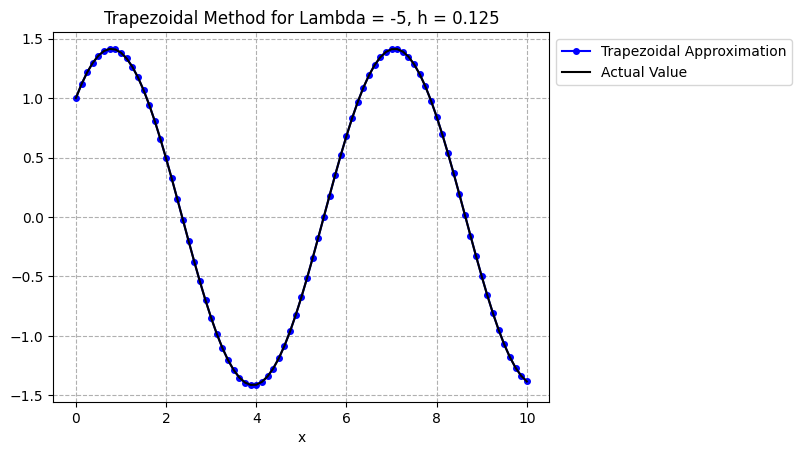

Lambda = -5, Step size h = 0.0625:
Error at t = 10.0: 0.000036
Relative error at t = 10.0: 0.000026


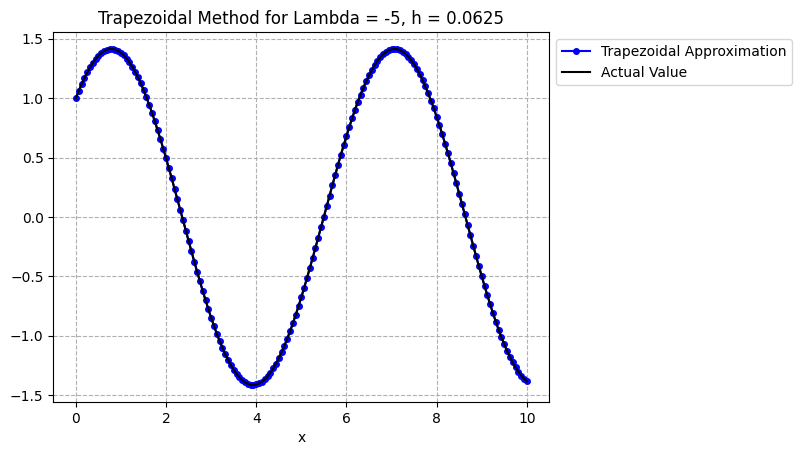

In [ ]:
h_vals = [0.5,0.25,0.125,0.0625]
solve_backward(-5,h_vals)
solve_trapezoidal(-5,h_vals)

# **Question 4**

Lambda = 5, Step size h = 0.0625:
Error at t = 10.0: 778277280183550216241152.000000
Relative error at t = 10.0: 562707990552810943938560.000000


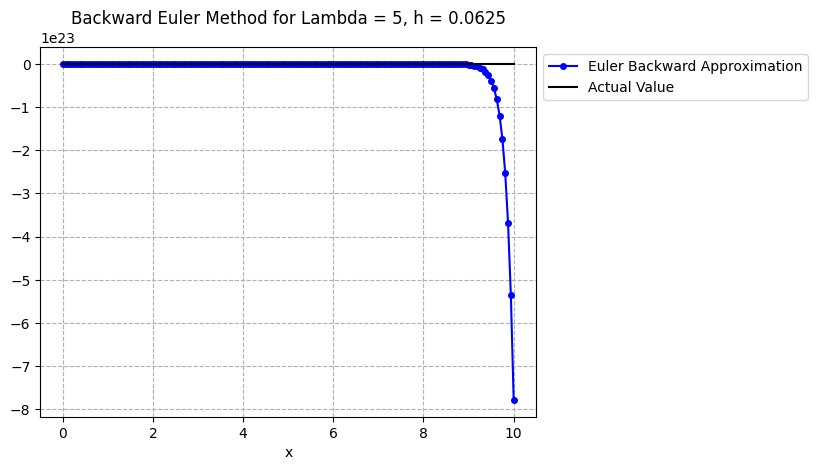

Lambda = 5, Step size h = 0.0625:
Error at t = 10.0: 392520604150778048.000000
Relative error at t = 10.0: 283799214028409344.000000


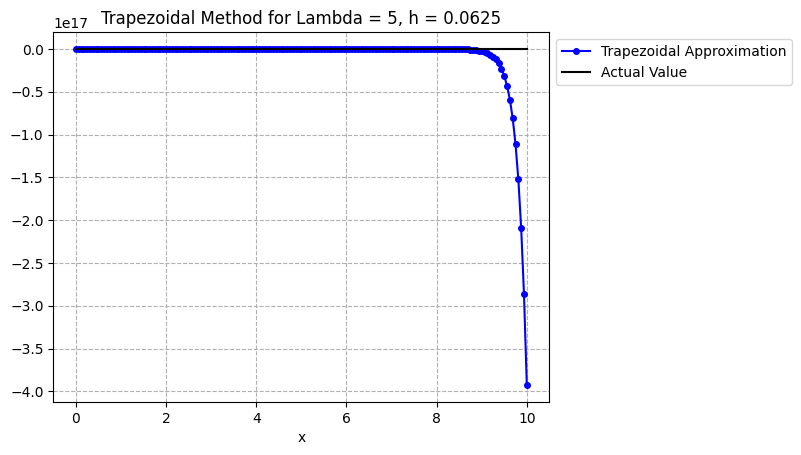

In [ ]:
solve_backward(5,[0.0625])
solve_trapezoidal(5,[0.0625])

# **Question 2 Problem 14 Section 8.5**

In [ ]:
def f(x, y):
    return -y + (x**0.1) * (1.1 + x)
 # RK2 method
def rk2_step(x, y, h):
    k1 = h * f(x, y)
    k2 = h * f(x + h, y + k1)
    y_next = y + 0.5 * (k1 + k2)
    return y_next
 # RK4 method
def rk4_step(x, y, h):
    k1 = h * f(x, y)
    k2 = h * f(x + 0.5 * h, y + 0.5 * k1)
    k3 = h * f(x + 0.5 * h, y + 0.5 * k2)
    k4 = h * f(x + h, y + k3)
    y_next = y + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y_next

In [ ]:
def solve_rk(method, h, x0, y0, x_end):
    x_values = np.arange(x0, x_end + h, h)
    y_values = np.zeros(len(x_values))
    y_values[0] = y0
    for i in range(1, len(x_values)):
        y_values[i] = method(x_values[i-1], y_values[i-1], h)
    return x_values, y_values

In [ ]:
x0, y0 = 0, 0  # Initial conditions
x_end = 5
h_values = [0.1, 0.05, 0.025, 0.0125, 0.00625]
exact_solution = lambda x: x ** 1.1

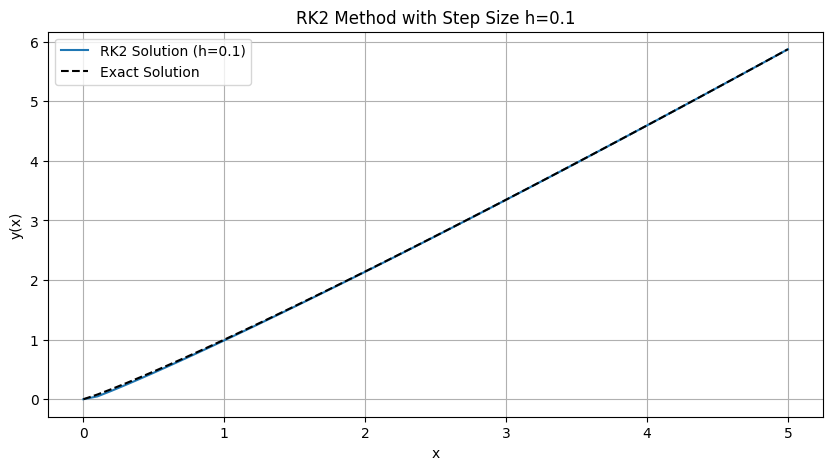

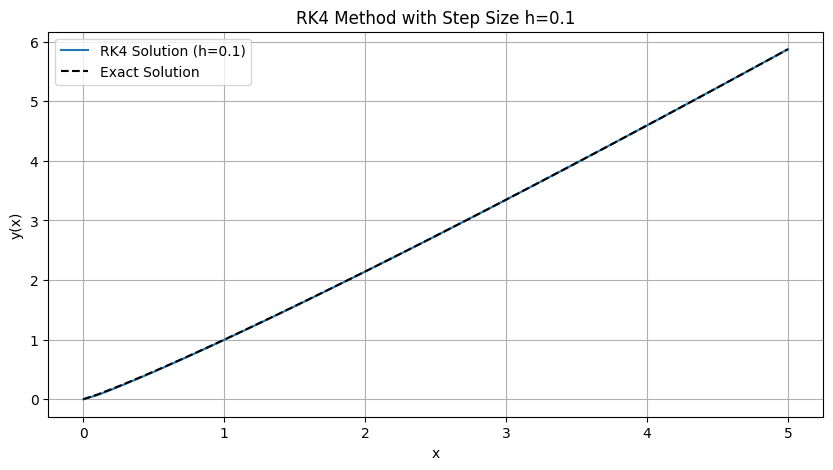

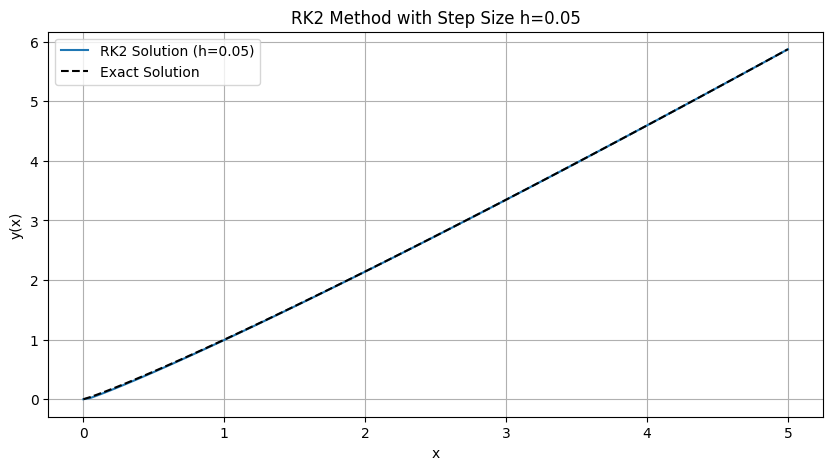

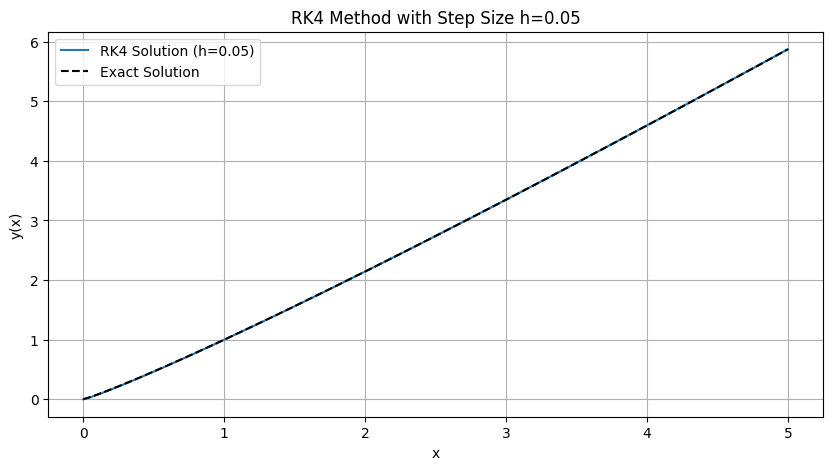

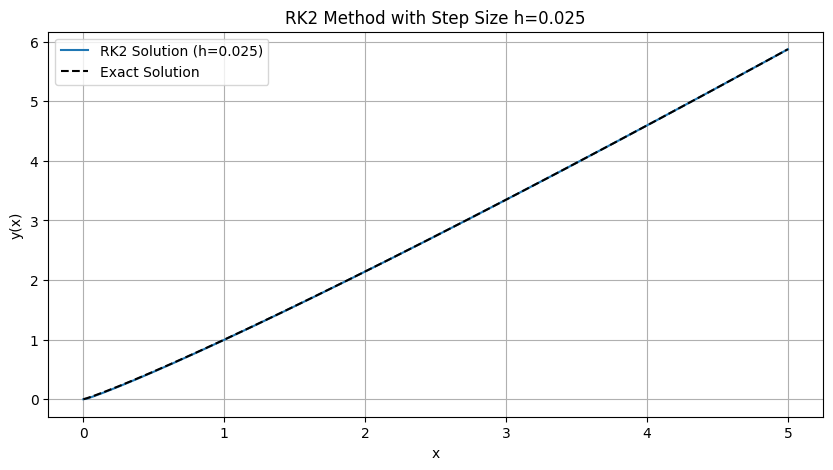

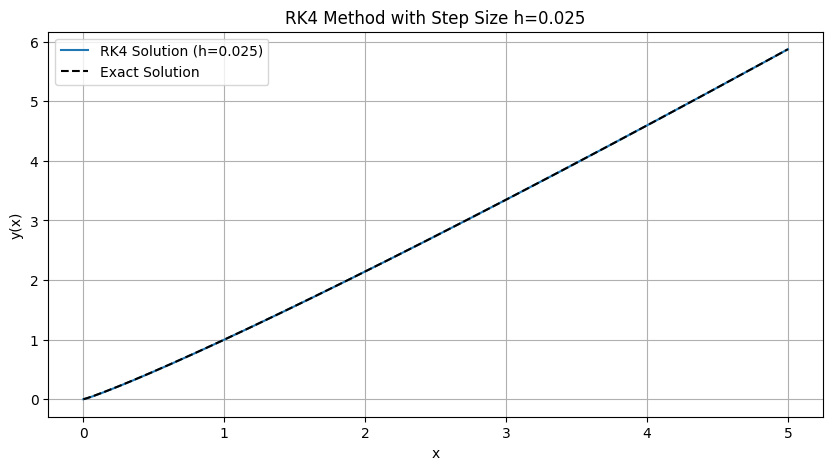

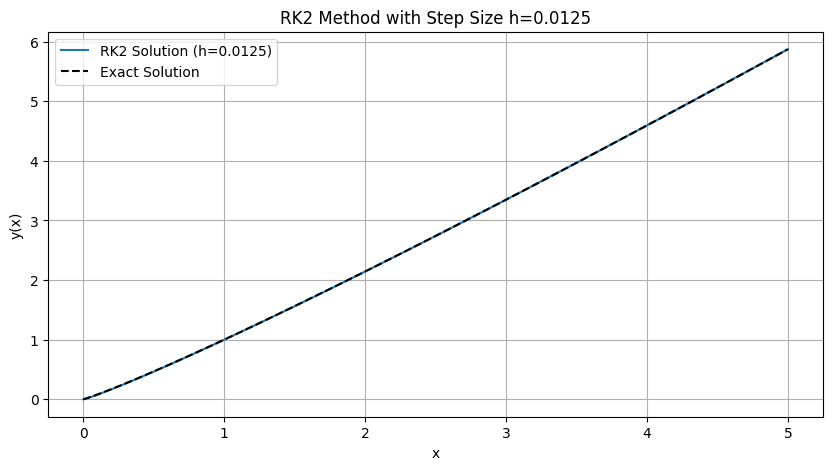

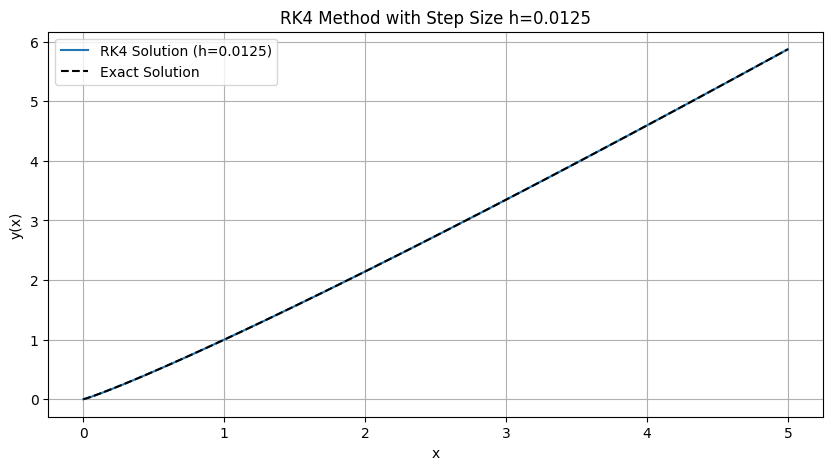

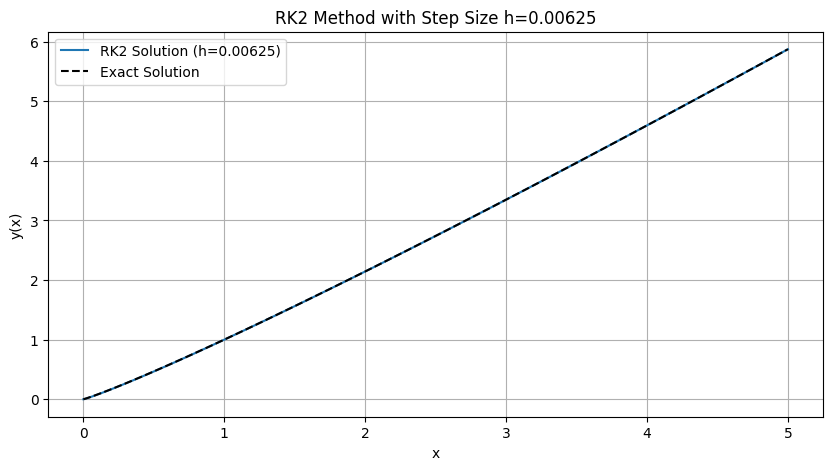

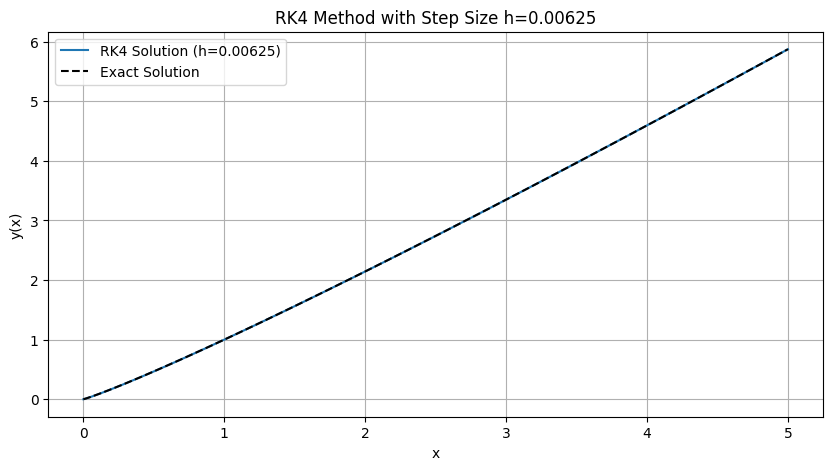

Errors for RK2 at h=0.00625: [0.0006331493013221889, 0.00023255374493080794, 8.529390596612174e-05, 3.11792128639965e-05, 1.1308009866262125e-05]
Errors for RK4 at h=0.00625: [0.00018335984116646387, 6.74543152410223e-05, 2.481505535945061e-05, 9.12894836613276e-06, 3.3583521599211963e-06]


In [ ]:
for h in h_values:
    x_rk2, y_rk2 = solve_rk(rk2_step, h, x0, y0, x_end)
    x_rk4, y_rk4 = solve_rk(rk4_step, h, x0, y0, x_end)
    # Calculate error at specific points x = 1, 2, 3, 4, 5
    x_points = [1, 2, 3, 4, 5]
    rk2_errors = [abs(y - exact_solution(x)) for x, y in zip(x_rk2, y_rk2) if x in x_points]
    rk4_errors = [abs(y - exact_solution(x)) for x, y in zip(x_rk4, y_rk4) if x in x_points]
    # Plot RK2 solution
    plt.figure(figsize=(10, 5))
    plt.plot(x_rk2, y_rk2, label=f'RK2 Solution (h={h})')
    plt.plot(x_rk2, exact_solution(x_rk2), 'k--', label='Exact Solution')
    plt.title(f'RK2 Method with Step Size h={h}')
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.legend()
    plt.grid()
    plt.show()
    # Plot RK4 solution
    plt.figure(figsize=(10, 5))
    plt.plot(x_rk4, y_rk4, label=f'RK4 Solution (h={h})')
    plt.plot(x_rk4, exact_solution(x_rk4), 'k--', label='Exact Solution')
    plt.title(f'RK4 Method with Step Size h={h}')
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.legend()
    plt.grid()
    plt.show()
# Print error ratios
print(f"Errors for RK2 at h={h}: {rk2_errors}")
print(f"Errors for RK4 at h={h}: {rk4_errors}")

Error Comparison with O(h^2)
The problem asks for a comparison of errors with O(h^2), which represents the error behavior of
a second-order method like RK2. Here's how the errors behave when the step size h is halved:

RK2 (Second-order):

Global error behaves as O(h^2).

If the step size h is halved: The error reduces by a factor of 4.

RK4 (Fourth-order):

 • Global error behaves as O(h^4).

 • If the step size h is halved: The error reduces by a factor of 16.

 Comparison to O(h^2):

 • RK2 follows the expected O(h^2) behavior, with error reduction proportional to h^2.

 • RK4 improves much faster, as its error reduction follows O(h^4), making RK4
significantly more accurate for the same step size.